# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind, levene


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
megaline_calls= pd.read_csv('/datasets/megaline_calls.csv')
megaline_internet= pd.read_csv('/datasets/megaline_internet.csv')
megaline_messages= pd.read_csv('/datasets/megaline_messages.csv')
megaline_plans= pd.read_csv('/datasets/megaline_plans.csv')
megaline_users= pd.read_csv('/datasets/megaline_users.csv')


## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
megaline_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
display(megaline_plans.head())


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


La tabla megaline_plans contiene 8 columnas, los nombres de dichas columnas siguen las buenas practicas. Se puede ver que tenemos 2 datos y no hay valores ausentes. 




## Corregir datos

- no se encotraron problemas en dataset. Solo el nombre de la columna plan_name se cambiara mas adelante a 'plan' para poder unirse con otro Dataframe

## Enriquecer los datos

- Se cambiara el nombre de la columna con el metodo rename

In [5]:
megaline_plans.rename(columns = {
    'plan_name' : 'plan'
}, inplace = True)

megaline_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan                   2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
megaline_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios
display(megaline_users.head())


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


La tabla megaline_users contiene 8 columnas, los nombres de dichas columnas siguen las buenas practicas. Se puede ver que tenemos 500 datos y solo hay valores ausentes en la columna churn_date, pero en este caso no la utilizaremos para el analisis. 

- user_id: es del tipo int64, en este caso se cambiara a tipo object ya que no tiene sentido esta en tipo int64. No se haran operaciones numericas con el user_id.
- reg_date: es del tipo object, pero deberia ser datetime.

### Corregir los datos

In [8]:
megaline_users['user_id'] = megaline_users['user_id'].astype('object')

megaline_users['reg_date'] = pd.to_datetime(megaline_users['reg_date'], format = '%Y-%m-%d')

megaline_users['user_id'].duplicated().sum()
megaline_users.duplicated().sum()

0

### Enriquecer los datos

- No hay datos por enriquecer

## Llamadas

In [9]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
megaline_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Imprime una muestra de datos para las llamadas
display(megaline_calls.head())


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


La tabla megaline_calls contiene 4 columnas, los nombres de dichas columnas siguen las buenas practicas. Se puede ver que tenemos 137735 datos y no hay valores ausentes. 

- id: la columna es de tipo object
- user_id: es del tipo int64, en este caso se cambiara a tipo object ya que no tiene sentido esta en tipo int64. No se haran operaciones numericas con el user_id.
- call_date: es del tipo object, pero deberia ser datetime.
- duration: es una columna tipo float64, por lo que decidimos mantenerla asi.

### Corregir los datos

In [11]:
megaline_calls['user_id'] = megaline_calls['user_id'].astype('object')

megaline_calls['call_date'] = pd.to_datetime(megaline_calls['call_date'], format = '%Y-%m-%d')

megaline_calls['id'].duplicated().sum()


megaline_calls.duplicated().sum()


0

### Enriquecer los datos

- Redondear las llamadas hacia arriba ( como indica en el proyecto)
- Añadir la columna del mes

In [12]:
megaline_calls['duration'] =  megaline_calls['duration'].apply(np.ceil)

megaline_calls['month'] = megaline_calls['call_date'].dt.month

display(megaline_calls.head())

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12


## Mensajes

In [13]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
megaline_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
# Imprime una muestra de datos para los mensajes
display(megaline_messages.head())


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


La tabla megaline_messages contiene 3 columnas, los nombres de dichas columnas siguen las buenas practicas. Se puede ver que tenemos 76051 datos y no hay valores ausentes.

- user_id: es del tipo int64, en este caso se cambiara a tipo object ya que no tiene sentido esta en tipo int64. No se haran operaciones numericas con el user_id.
- message_date: es del tipo object, pero deberia ser datetime.

### Corregir los datos

In [15]:
megaline_messages['user_id'] = megaline_messages['user_id'].astype('object')
megaline_messages['message_date'] = pd.to_datetime(megaline_messages['message_date'], format = '%Y-%m-%d')

megaline_messages['id'].duplicated().sum()

megaline_messages.duplicated().sum()

0

### Enriquecer los datos


- Añadir la columna de mes

In [16]:
megaline_messages['month'] = megaline_messages['message_date'].dt.month

display(megaline_calls.head())

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12


## Internet

In [17]:
# Imprime la información general/resumida sobre el DataFrame de internet
megaline_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [18]:
# Imprime una muestra de datos para el tráfico de internet
display(megaline_internet.head())


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


La tabla megaline_internet contiene 4 columnas, los nombres de dichas columnas siguen las buenas practicas. Se puede ver que tenemos 104825 datos y no hay valores ausentes.

- user_id: es del tipo int64, en este caso se cambiara a tipo object ya que no tiene sentido esta en tipo int64. No se haran operaciones numericas con el user_id.
- session_date: es del tipo object, pero deberia ser datetime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [19]:
megaline_internet['user_id'] = megaline_internet['user_id'].astype('object')
megaline_internet['session_date'] = pd.to_datetime(megaline_internet['session_date'], format = '%Y-%m-%d') 

megaline_internet.info()

megaline_internet['id'].duplicated().sum()
megaline_internet.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


0

### Enriquecer los datos

- Transformar los mb a gb
- Añadir columna de mes

In [20]:
megaline_internet['gb_used'] = megaline_internet['mb_used'] / 1024

megaline_internet['month'] = megaline_internet['session_date'].dt.month

display(megaline_internet.head())

,id,user_id,session_date,mb_used,gb_used,month
0,1000_13,1000,2018-12-29,89.86,0.087754,12
1,1000_204,1000,2018-12-31,0.00,0.000000,12
2,1000_379,1000,2018-12-28,660.40,0.644922,12
3,1000_413,1000,2018-12-26,270.99,0.264639,12
4,1000_442,1000,2018-12-27,880.22,0.859590,12


## Estudiar las condiciones de las tarifas

In [21]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

display(megaline_plans.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario


In [22]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

monthly_calls = megaline_calls.groupby(['user_id', 'month']).agg(
    total_calls = ('id','count'),
    total_duration = ('duration','sum')
).reset_index()

monthly_calls.head()

,user_id,month,total_calls,total_duration
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0


In [23]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

monthly_messages = megaline_messages.groupby(['user_id','month']).agg(
    total_messages = ('id','count')).reset_index()

monthly_messages.head()



,user_id,month,total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [24]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

monthly_internet = megaline_internet.groupby(['user_id','month']).agg(
    total_gb = ('gb_used','sum')).reset_index()

monthly_internet['total_gb'] = monthly_internet['total_gb'].apply(np.ceil)

monthly_internet.head()



,user_id,month,total_gb
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0


In [25]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
monthly_info = monthly_calls.merge(monthly_messages, on = ['user_id','month'], how = 'outer')
monthly_info = monthly_info.merge(monthly_internet, on = ['user_id','month'], how = 'outer')

monthly_info.head()


,user_id,month,total_calls,total_duration,total_messages,total_gb
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0
3,1001,10,65.0,393.0,53.0,22.0
4,1001,11,64.0,426.0,36.0,19.0


In [26]:
# Añade la información de la tarifa


user_info = megaline_users.merge(megaline_plans, on = 'plan')

monthly_info = monthly_info.merge(user_info, on = 'user_id')

monthly_info.head()

,user_id,month,total_calls,total_duration,total_messages,total_gb,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01
1,1001,8,27.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,500,20,10,0.03,0.03
2,1001,9,49.0,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,500,20,10,0.03,0.03
3,1001,10,65.0,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,500,20,10,0.03,0.03
4,1001,11,64.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,500,20,10,0.03,0.03


In [27]:
# Calcula el ingreso mensual para cada usuario

##LlAMADAS
monthly_info['minutes_to_pay'] = monthly_info['total_duration'] - monthly_info['minutes_included']
monthly_info['minutes_to_pay'] = monthly_info['minutes_to_pay'].apply(lambda x: max(x,0))
monthly_info['minutes_price'] = monthly_info['minutes_to_pay'] * monthly_info['usd_per_minute']

##MENSAJES
monthly_info['messages_to_pay'] = monthly_info['total_messages'] - monthly_info['messages_included']
monthly_info['messages_to_pay'] = monthly_info['messages_to_pay'].apply(lambda x: max(x,0))
monthly_info['messages_price'] = monthly_info['messages_to_pay'] * monthly_info['usd_per_message']

##INTERNET
monthly_info['gb_to_pay'] = monthly_info['total_gb'] - monthly_info['mb_per_month_included']/1024
monthly_info['gb_to_pay'] = monthly_info['gb_to_pay'].apply(lambda x: max(x,0))
monthly_info['gb_price'] = monthly_info['gb_to_pay'] * monthly_info['usd_per_gb']

monthly_info['total_price'] = monthly_info['gb_price'] + monthly_info['messages_price'] + monthly_info['minutes_price'] + monthly_info['usd_monthly_pay']

monthly_info.head()

,user_id,month,total_calls,total_duration,total_messages,total_gb,first_name,last_name,age,city,...,usd_per_gb,usd_per_message,usd_per_minute,minutes_to_pay,minutes_price,messages_to_pay,messages_price,gb_to_pay,gb_price,total_price
0,1000,12,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,7,0.01,0.01,0.0,0.0,0.0,0.00,0.0,0.0,70.00
1,1001,8,27.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,10,0.03,0.03,0.0,0.0,0.0,0.00,0.0,0.0,20.00
2,1001,9,49.0,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,10,0.03,0.03,0.0,0.0,0.0,0.00,0.0,0.0,20.00
3,1001,10,65.0,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,10,0.03,0.03,0.0,0.0,3.0,0.09,7.0,70.0,90.09
4,1001,11,64.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,10,0.03,0.03,0.0,0.0,0.0,0.00,4.0,40.0,60.00


## Estudia el comportamiento de usuario

### Llamadas

In [28]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

mean_duration= monthly_info.pivot_table(index='month', columns= 'plan', values = 'total_duration', aggfunc='mean')
display(mean_duration)


plan,surf,ultimate
month,,
1,203.000000,193.500000
2,297.000000,470.333333
3,330.000000,304.250000
4,351.540000,336.857143
5,410.240000,406.241379
6,435.791667,387.444444
7,453.733333,427.067797
8,417.849057,421.436620
9,420.732984,437.511628


<AxesSubplot:xlabel='month'>

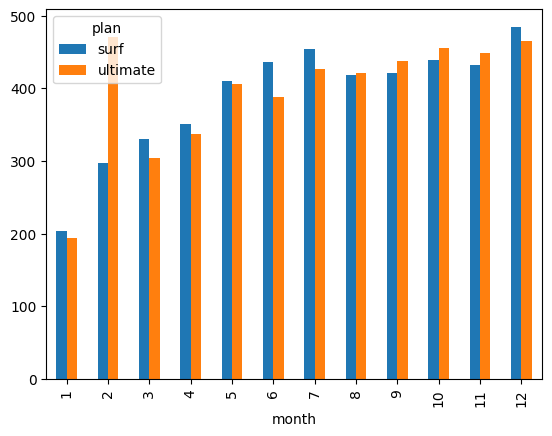

In [29]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

mean_duration.plot(kind='bar')


In [30]:
# Calcula la media y la varianza de la duración mensual de llamadas.

duration_mean_per_month = monthly_info.pivot_table(index='plan',values='total_duration', aggfunc=['mean','var'])

duration_mean_per_month.columns = ['mean','var']

duration_mean_per_month

,mean,var
plan,,
surf,436.519741,52571.063243
ultimate,434.676017,56573.632247


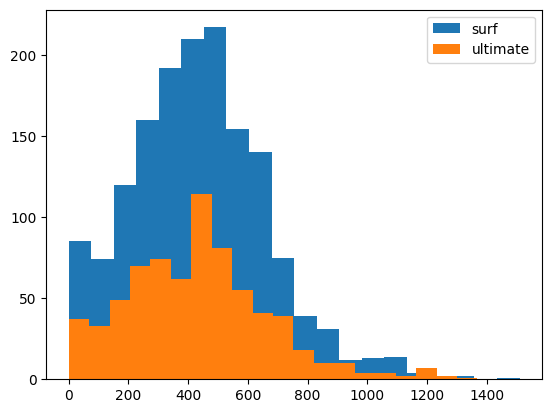

In [31]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

surf = monthly_info.query('plan == "surf"')
ultimate = monthly_info.query('plan == "ultimate"' )

plt.hist(surf['total_duration'], bins= 20 ,label = 'surf')
plt.hist(ultimate['total_duration'], bins= 20, label = 'ultimate')
plt.legend()
plt.show()

El comportamiento de los usuarios con respecto a las llamadas si varia en funcion al al plan. Los minutos usado en el plan SURF son mayores al del plan ultimate. 

### Mensajes

In [32]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
mean_messages= monthly_info.pivot_table(index='month', columns= 'plan', values = 'total_messages', aggfunc='mean').apply(np.ceil)
display(mean_messages)


plan,surf,ultimate
month,,
1,21.0,21.0
2,22.0,26.0
3,22.0,35.0
4,25.0,29.0
5,34.0,45.0
6,34.0,37.0
7,36.0,42.0
8,38.0,48.0
9,40.0,46.0


In [33]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

mean_internet= monthly_info.pivot_table(index='month', columns= 'plan', values = 'total_gb', aggfunc='mean')
display(mean_internet)


plan,surf,ultimate
month,,
1,5.000000,7.250000
2,12.222222,17.285714
3,13.565217,18.416667
4,12.469388,16.333333
5,14.302632,16.862069
6,15.810526,15.425532
7,17.016667,16.491525
8,17.201258,17.845070
9,16.777202,17.011628


<AxesSubplot:title={'center':'Comparison messages per month for SURF and ULTIMATE'}, xlabel='month'>

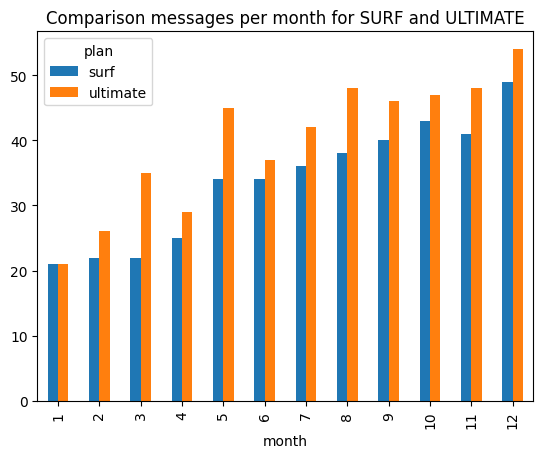

In [34]:
mean_messages.plot(kind='bar', title= 'Comparison messages per month for SURF and ULTIMATE')


Con respeceto a los mensajes el comportamiento de los usuarios de ULTIMATE es mayor a SURF. A excepcion del primer mes del año, que fue igual para ambos.

### Internet

<AxesSubplot:title={'center':'Comparison internet per month for SURF and ULTIMATE'}, xlabel='month'>

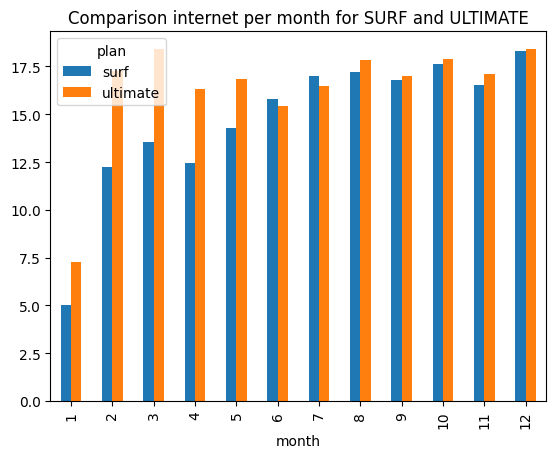

In [35]:
mean_internet.plot(kind='bar', title= 'Comparison internet per month for SURF and ULTIMATE')

Los primeros 5 meses del año el trafico de internet de los usuarios de ULTIMATE era mucho mayor que la de SURF. Pasando el mes 5 la brecha se fue disminuyendo.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [36]:
mean_total_income= monthly_info.pivot_table(index='month', columns= 'plan', values = 'total_price', aggfunc='sum')
display(mean_total_income)

plan,surf,ultimate
month,,
1,20.00,210.0
2,119.57,350.0
3,616.65,546.0
4,1420.70,1169.0
5,2695.43,1491.0
6,3645.67,2667.0
7,5500.77,3402.0
8,7661.59,4130.0
9,8407.94,5068.0


<AxesSubplot:title={'center':'Comparison incomes per month for SURF and ULTIMATE'}, xlabel='month'>

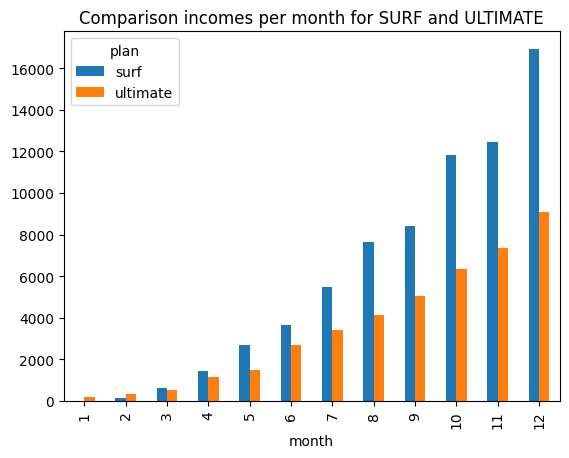

In [37]:
mean_total_income.plot(kind='bar', title= 'Comparison incomes per month for SURF and ULTIMATE')

Se concluye que los ingresos mensuales por usuario son mayor en el plan SURF a diferencia del plan ULTIMATE que tiene menos ingresos.

## Prueba las hipótesis estadísticas

El ingreso promedio de los usuario de las tarifas ULTIMATE Y SURF difieren:

- H0: El ingreso promedio de los usuarios ULTIMATE y SURF son iguales.
- HA: El ingreso promedio de los usuarios ULTIMATE y SURF son distintos.

In [38]:
# Prueba las hipótesis
alpha = 0.05

surf_income = monthly_info[monthly_info['plan'] == 'surf']['total_price'].dropna()
ultimate_income = monthly_info[monthly_info['plan'] == 'ultimate']['total_price'].dropna()

_, pvalue = ttest_ind(surf_income,ultimate_income, equal_var = False)

if pvalue < alpha:
    print(f'p-value:{pvalue} - Rechazamos la hipotesis nula')
else:
    print(f'p-value:{pvalue} - No Rechazamos la hipotesis nula')


p-value:5.756661975640558e-13 - Rechazamos la hipotesis nula



El ingreso promedio de los usuarios del area NY-NJ difieren a los de otras regiones:

- H0: El ingreso promedio de los usuarios de NY-NJ son iguales.
- HA: El ingreso promedio de los usuarios NY-NJ son distintos.

In [39]:
# Prueba las hipótesis

#New York-Newark-Jersey City, NY-NJ-PA MSA

income_NY_NJ = monthly_info[monthly_info['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_price'].dropna()
income_other_cities = monthly_info[monthly_info['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_price'].dropna()

_, pvalue = ttest_ind(income_NY_NJ,income_other_cities, equal_var = False)

if pvalue < alpha:
    print(f'p-value:{pvalue} - Rechazamos la hipotesis nula')
else:
    print(f'p-value:{pvalue} - No Rechazamos la hipotesis nula')

p-value:0.004477811025531861 - Rechazamos la hipotesis nula


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

- Se concluye que el plan SURF genera mas ingresos que el plan ULTIMATE. La empresa deberia invertir mas publicidad en este plan
- Se rechaza la hipotesis que los ingresos promedio de los usuarios ULTIMATE y SURF son iguales.
- Se rechaza la hipotesis que los ingresos promedio de los usuarios de NY-NJ son iguales.